In [204]:
import numpy as np
import matplotlib.pyplot as plt
# neighbors traite de l'algorithme, datasets contient des données exemples
from sklearn import neighbors, datasets

# Les données sont déjà intégrées dans le module
iris = datasets.load_iris()     # un dictionnaire contenant les données
print(iris.keys())              # affiche les clés du  dictionnaire
print(iris['feature_names'])    # affiche les noms des données numériques
print(iris['target_names'])     # les noms des catégories d'iris
# Récupération des données : une ligne par fleur
petales = True                 # on s'intéresse aux pétales ou aux sépales
if petales:
    X = iris['data'][:, 2:]     # on ne garde que les dimensions des pétales
    donnee = 'petales'
else:
    X = iris['data'][:, :2]     # on ne garde que les dimensions des sépales
    donnee = 'sepales'

C = iris['target']              # les catégories
sauvegarde = False


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


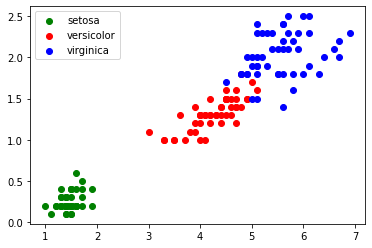

In [205]:
def graphique():
    # On trace les nuages de points représentant chaque fleur
    # La catégorie est représenté par la couleur
    couleurs = ['g', 'r', 'b']
    for i in range(len(iris['target_names'])):
        plt.scatter(X[C == i, 0], X[C == i, 1], color=couleurs[i],
                    label=iris['target_names'][i])
    plt.legend()
plt.figure()
graphique()
if sauvegarde:
    plt.savefig(r'D:\Users\Richard\OneDrive - ac-dijon.fr\Prépa PT\Latex\info\iris00-'+donnee+'.png')
plt.show()


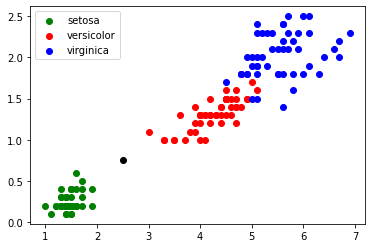

In [206]:
# Une nouvelle fleur
longueur=2.5 if petales else 5.7
largeur=0.75 if petales else 3.3
graphique()
plt.scatter(longueur, largeur, color='k')
if sauvegarde:
    plt.savefig(r'D:\Users\Richard\OneDrive - ac-dijon.fr\Prépa PT\Latex\info\iris01-'+donnee+'.png')
plt.show()

In [207]:
def distance(a, b):
    return np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)


def trace_voisins(k):
    plt.scatter(longueur, largeur, color='k')
    d = [(i, distance(X[i], (longueur, largeur))) for i in range(len(X))]
    d.sort(key=lambda z: z[1])
    for i in range(k):
        plt.plot([longueur, X[d[i][0], 0]], [largeur, X[d[i][0], 1]], 'k')
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='datalim')
    ax.add_patch(plt.Circle((longueur, largeur),
                            d[k-1][1], color='k', fill=False))


# Algorithme des $k$ plus proches voisins

In [208]:
def classifie(k):
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    model.fit(X, C)
    prediction = model.predict([[longueur, largeur]])
    print(iris['target_names'][prediction[0]])
    plt.figure()
    plt.title(r'$k=$'+repr(k))
    graphique()
    trace_voisins(k)
    if sauvegarde:
        plt.savefig(r'D:\Users\Richard\OneDrive - ac-dijon.fr\Prépa PT\Latex\info\iris-'+donnee+'-k='+str(k)+'.png')
    plt.show()

setosa


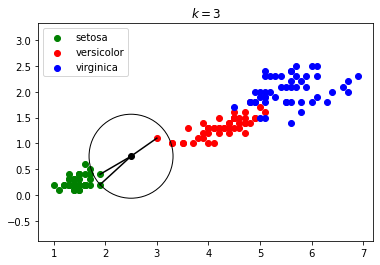

versicolor


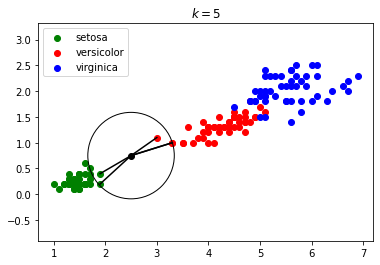

setosa


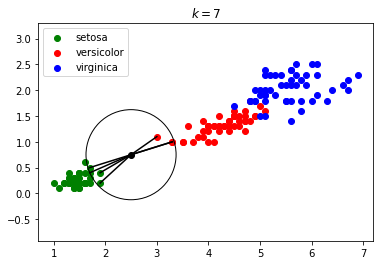

In [209]:
classifie(3)
classifie(5)
classifie(7)